In [1]:
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import plotnine as p9
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

# Summary of the pairplot graphs for bodyfat data  
Based on the pairplot scatterplot matrix, we can see that the histogram graphs provided in the pairplot shows that numerical variables that are normally distributed (no skewage) are the variables of density, bodyfat, height, chest, forearm and wrist. Indicating that those are the data is very symmetrical distributed around it's mean and that it has predictible spread overall. Numerical variables that are right-skewed are neck, abdomen, hip, knee, and ankle. These variables have characters indicate that the mean is distributed to the left of the mean and has a spread that is dragged to the left of the mean.  


# 1. )  Visualizing Graphs for data with categorical variable as explanatory and numerical variables as
Next we look at the NY homes data (Sarotoga_NY_Homes) to try and extropolate certain noticable details and facts about the dataset through multifaceted boxplots with imports from seaborn package. What do the categories in the dataset show?  
First we will use catplot

In [3]:
(homes :=
pl.read_csv('./data/Saratoga_NY_Homes.csv')
)

Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Fireplaces?
i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64
132500,0.09,0,42,50000,0,0,3,4,2,906,35,2,1,1.0,5,1
181115,0.92,0,0,22300,0,0,2,3,2,1953,51,3,0,2.5,6,0
109000,0.19,0,133,7300,0,0,2,3,3,1944,51,4,1,1.0,8,1
155000,0.41,0,13,18700,0,0,2,2,2,1944,51,3,1,1.5,5,1
86060,0.11,0,0,15000,1,1,2,2,3,840,51,2,0,1.0,3,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
289000,0.38,0,32,24200,0,0,2,3,3,2310,61,5,1,2.5,11,1
285000,0.94,0,37,36200,0,0,2,3,3,2564,61,4,1,2.5,11,1
194900,0.39,0,9,20400,0,0,2,2,3,1099,51,2,0,1.0,3,0


In [4]:
category = ['Waterfront','New.Construct','Central.Air', 'Fireplaces?']

numeric = 'Price'

(homes_predictor :=
 homes
    .select(['Waterfront','New.Construct','Central.Air', 'Fireplaces?','Price'])
    .unpivot(category, 
             index = numeric,
             variable_name = 'predictor',
             value_name = 'label'
    )
 
 )

Price,predictor,label
i64,str,i64
132500,"""Waterfront""",0
181115,"""Waterfront""",0
109000,"""Waterfront""",0
155000,"""Waterfront""",0
86060,"""Waterfront""",0
…,…,…
289000,"""Fireplaces?""",1
285000,"""Fireplaces?""",1
194900,"""Fireplaces?""",0


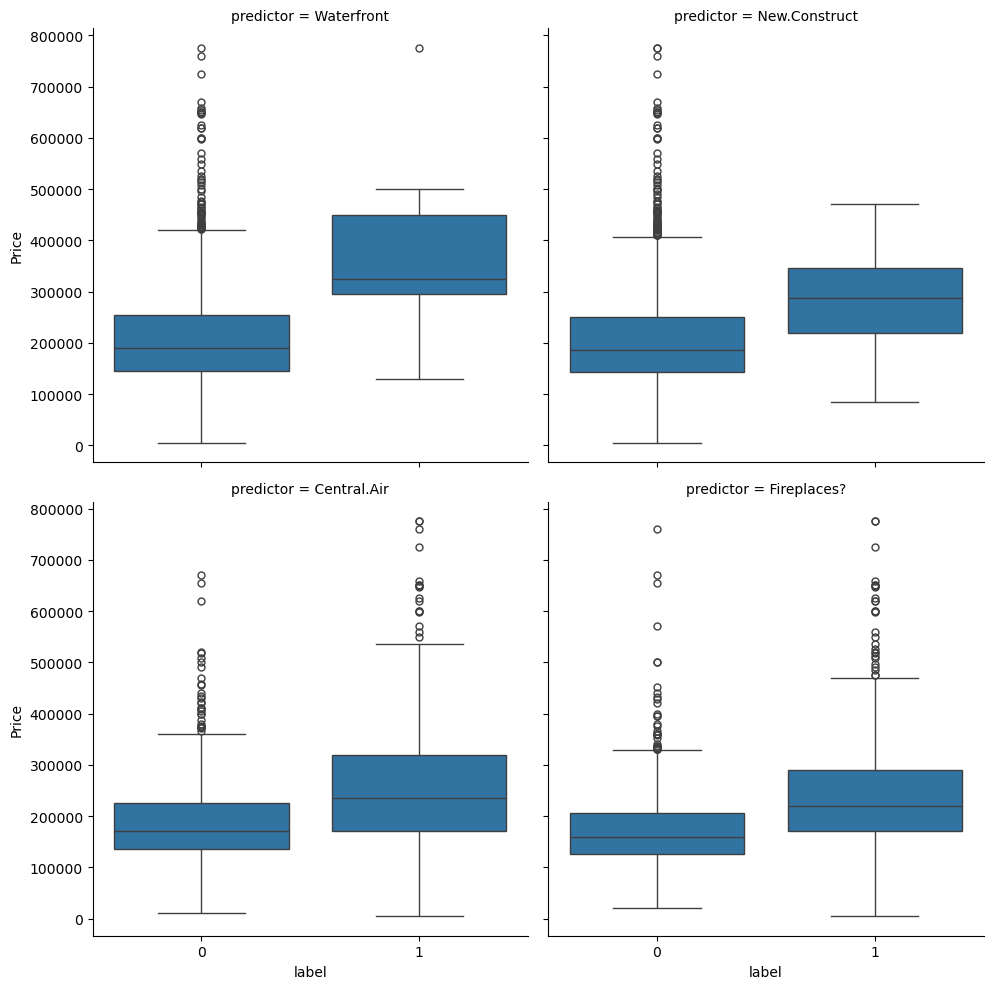

In [5]:
sns.catplot( 
    data = homes_predictor, x = 'label', y = 'Price',
    col = 'predictor', kind = 'box', col_wrap = 2
)

# 2.)  Writing a Summary for the catplots (or faceted boxplots) 
A series of catplots facted by the categorical label that determined their house type and whether there was a obvious visual difference in price. 
The price of Waterfront houses were visually higher than those that weren't waterfront houses with several outliars for those that weren't Waterfront but were still far more expensive than the average non 'beachfront' house. One noticeable aspect of this catplot is the fact that the IQR's are not within range of each other, as the waterfront house IQR was higher.

The price of new construction homes were considerably higher than the price of older construction homes but the IQR's were within range of each other, with the new construction being slightly higher but with already built homes generally having more outliars/ reaching prices

The price of homes with central air were considerably higher than the prices of homes with no central air but again there was that intricate detail of the fact that the IQR's were within range of each other and only the tail ends (or Q3) of the boxplots had some substantial differences. Both had a good deal of  higher  priced outliars. 

The price of houses with fireplaces were considerably higher than the prices of homes without a fireplace though for the most part the boxplots were within range of each other with only a slightly more expensive IQR range for fireplace houses. Both houses with and without fireplaces had alot of expensive outliars.  

# A little something else I tried (don't pay attention to it :P)

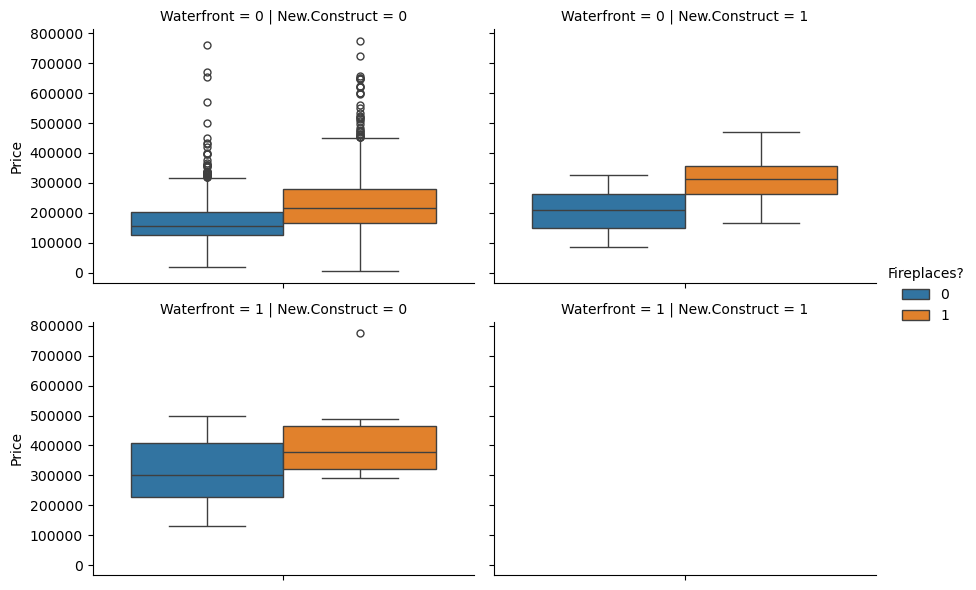

In [6]:
sns.catplot(
    data = homes.to_pandas(), y='Price',
    row = 'Waterfront', col = 'New.Construct', hue = 'Fireplaces?' , 
    kind = 'box', height =3, aspect = 1.5
)